In [7]:
from download_openaq import download
import pandas as pd
import numpy as np

In [8]:
aqdata = download('US Diplomatic Post: Kampala',verbose=True,startdate="2018-01-01")

Trying cache
Loaded 9244 records from cache.
Loading API page 1
Loading API page 2
Loading API page 3
Loading API page 4
End of pagination on page 4
Combining 9244 cached records with 2168 API records
Total data set contains 9244 records


/home/mike/Documents/Research/download_openaq/download_openaq/__init__.py:96: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  data = pd.concat([data,olddata]).drop_duplicates()


In [10]:
weatherdata = pd.read_csv('tahmo_Makerere_Synopticdata.csv')

In [11]:
aqdata['timestamp'] = [pd.Timestamp(st)-pd.Timedelta("3 hours") for st in aqdata.index]

In [12]:
weatherdata['timestamp'] = [pd.Timestamp(dt) for dt in weatherdata['dateTimeUTC']]

In [13]:
alldata = weatherdata.join(aqdata.set_index('timestamp'),on='timestamp')

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2

In [123]:
wd = alldata['winddirection']
raw =np.c_[alldata['winddirection'],alldata['windspeed (m/s)'],alldata['value'],alldata['timestamp'],[a.hour for a in alldata['timestamp']]]
convert={'N':0,'NE':45,'E':90,'SE':135,'S':180,'SW':225,'W':270,'NW':315}
raw[:,0]=[convert[st] for st in raw[:,0]]
raw=raw.astype(float)
raw = raw[raw[:,1]>=0,:]
raw = raw[raw[:,2]>=0,:]
raw = raw[~np.isnan(raw[:,2]),:]
#raw[:,1] = np.log(raw[:,1])

In [84]:
intervalstart = 0
intervalend=23


1.0

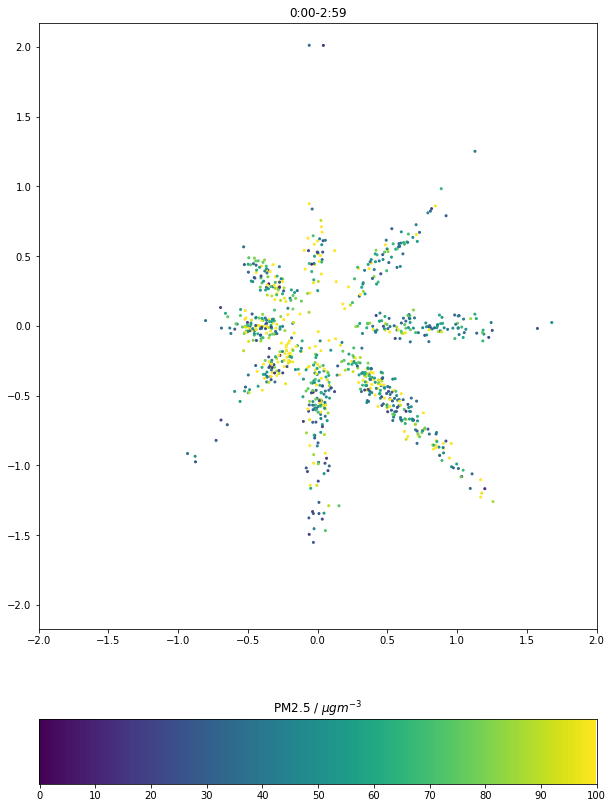

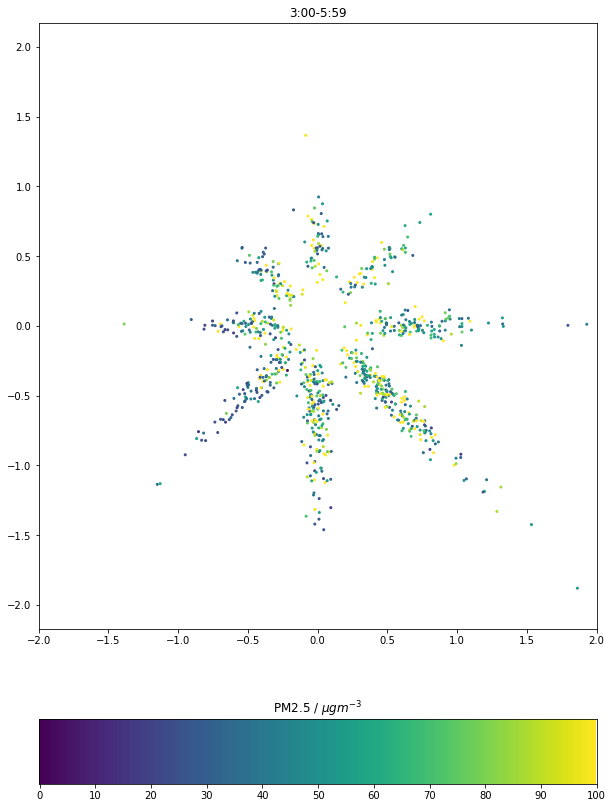

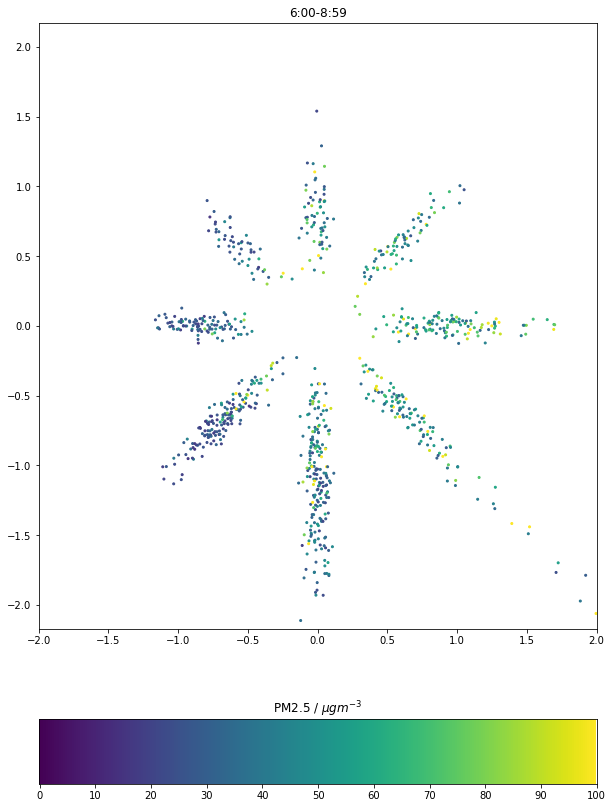

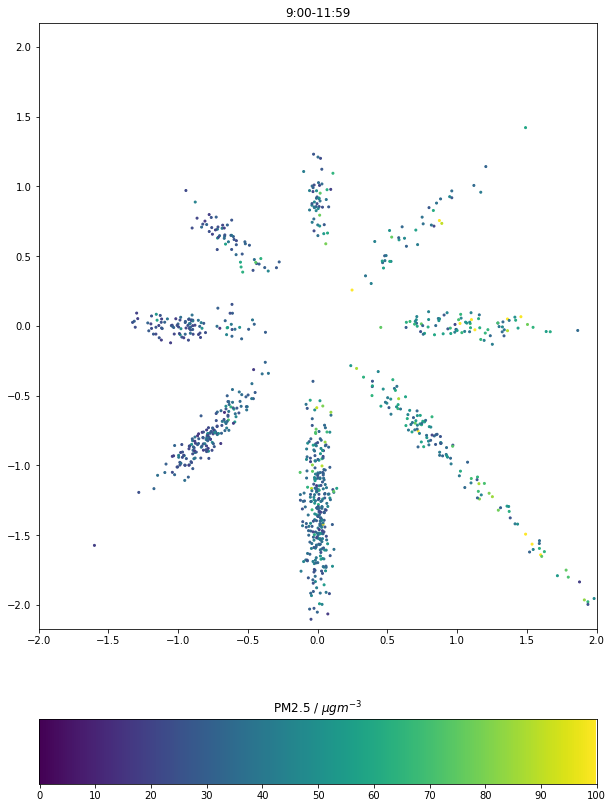

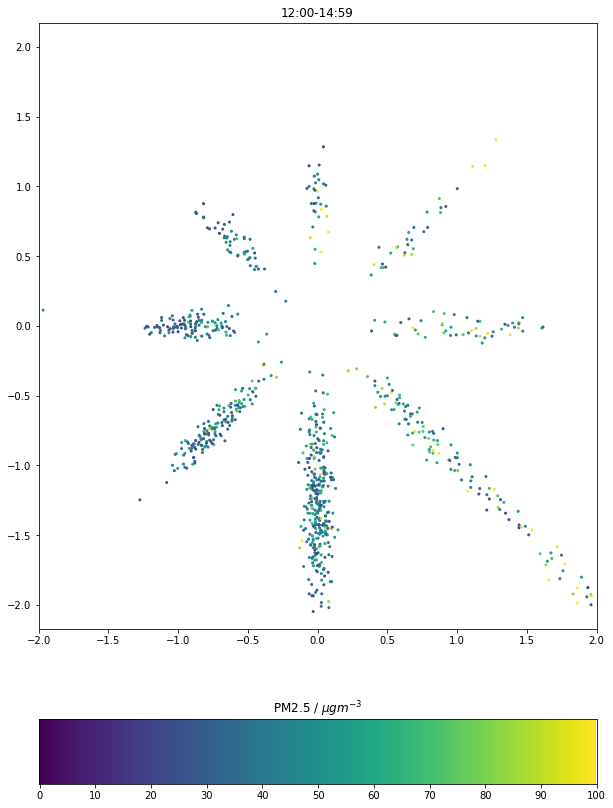

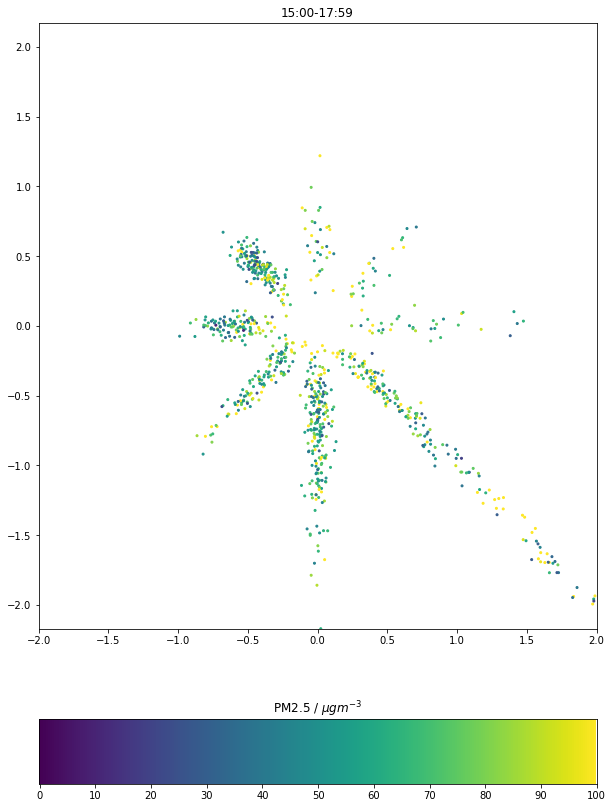

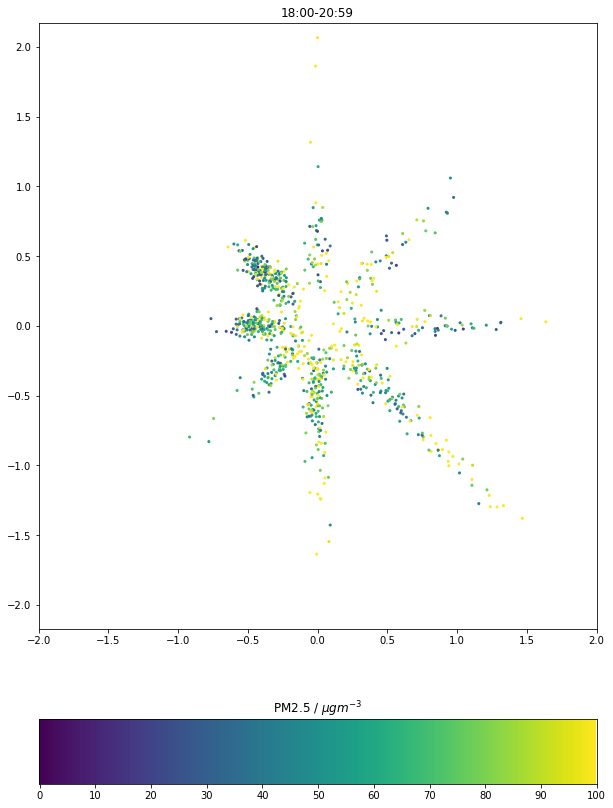

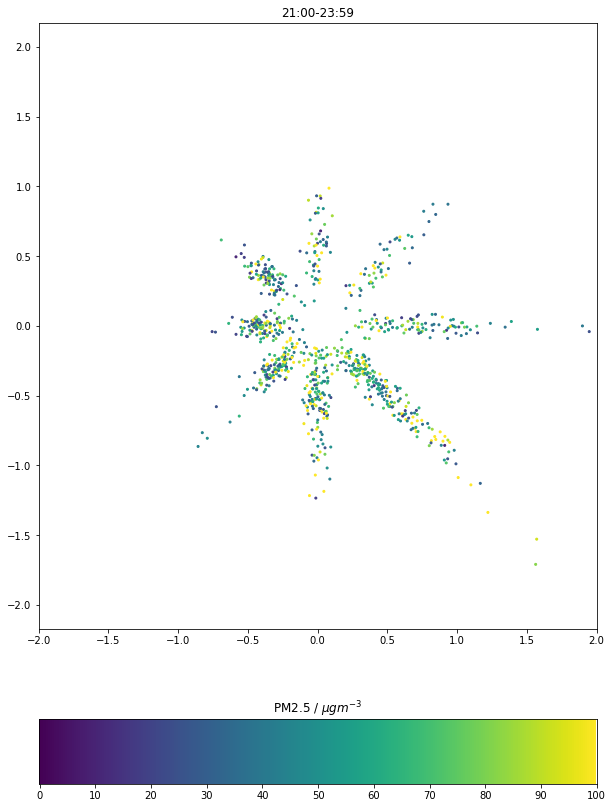

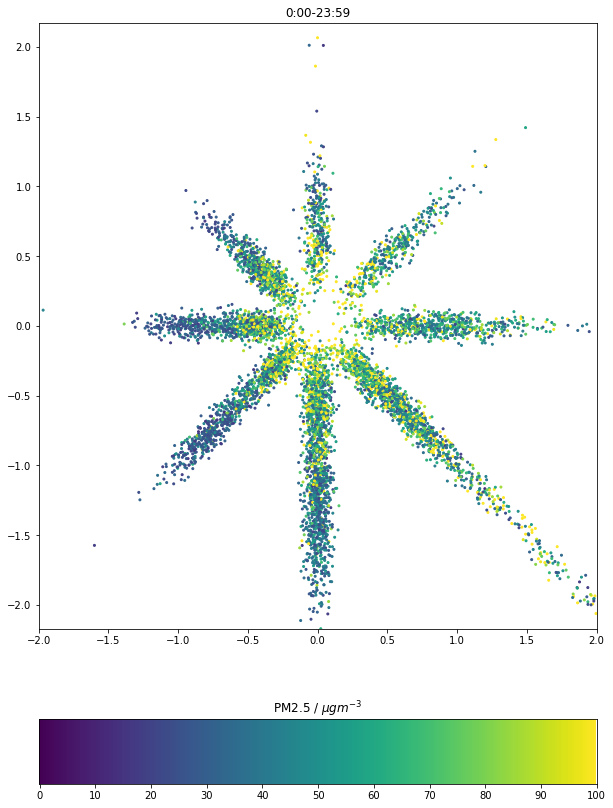

In [96]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#for r in raw:
#    col = []
#    plt.plot(np.cos(np.deg2rad(r[0]))*r[1],np.sin(np.deg2rad(r[0]))*r[1],'.',alpha=0.1,color=col)#alpha=r[2]/np.nanmax(raw[:,2]))
maxpm25 = 100


cols = raw[:,2]/maxpm25#np.nanmax(raw[:,2])
cols[cols<0]=0
cols[cols>1]=1
cols = cm.viridis(cols)
#cols = np.c_[cols,cols,1-cols,cols*0+1]

intervalstarts = []
intervalends = []
for h in range(0,24,3):
    intervalstarts.append(h)
    intervalends.append(h+2)
intervalstarts.append(0)
intervalends.append(23)

x=np.cos(np.deg2rad(90-raw[:,0]))*raw[:,1]
y=np.sin(np.deg2rad(90-raw[:,0]))*raw[:,1]
x+=np.random.randn(len(x))*0.05
y+=np.random.randn(len(x))*0.05

for intervalstart,intervalend in zip(intervalstarts,intervalends):
    
    plt.figure(figsize=[10,14])
    plt.subplot2grid([10,1],[0,0],8,1)
    plt.title("%d:00-%d:59" % (intervalstart,intervalend))
    keep = (raw[:,4]>=intervalstart) & (raw[:,4]<=intervalend)
    
    plt.scatter(x[keep],y[keep],4,alpha=1,color=cols[keep])
    plt.axis('equal')
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.subplot2grid([10,1],[9,0])
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    plt.imshow(gradient, aspect='auto', cmap=plt.get_cmap('viridis'))
    #plt.gca().set_axis_off()
    plt.xticks(np.linspace(0,gradient.shape[1],11),["%0.0f" % d for d in np.linspace(0,maxpm25,11)])
    plt.yticks([],[])
    plt.title('PM2.5 / $\mu g m^{-3}$')
    plt.savefig('demo_%d_%d.pdf' % (intervalstart,intervalend))


In [16]:
from matplotlib import cm

In [22]:
cm.viridis(1.0)

(0.993248, 0.906157, 0.143936, 1.0)

In [121]:
for intervalstart,intervalend in zip(intervalstarts,intervalends):
    print("%d:00-%d:59" % (intervalstart,intervalend))
    keep = (raw[:,4]>=intervalstart) & (raw[:,4]<=intervalend)
    for d in range(0,360,45):
        dat = raw[(raw[:,0]==d) & keep,2]
        mean = np.mean(dat)
        ste = np.std(dat)/np.sqrt(len(dat))
        graphstring = "-" * int(mean-1)
        #graphstring+= " " * 10
        graphstring = graphstring[0:(int(mean-ste*1.96)-1)] + ":" + graphstring[int(mean-ste*1.96):]
        graphstring+="|"
        graphstring+= "-" * int(ste*1.96-1) + ":"
        print("   %4d %0.1f +/- %0.1f %s" % (d,mean,ste,graphstring))

0:00-2:59
      0 78.3 +/- 6.6 ----------------------------------------------------------------:------------|------------:
     45 62.2 +/- 3.8 -----------------------------------------------------:-------|------:
     90 54.8 +/- 2.1 -------------------------------------------------:---|---:
    135 68.4 +/- 2.4 --------------------------------------------------------------:----|---:
    180 66.1 +/- 3.2 ----------------------------------------------------------:------|-----:
    225 74.4 +/- 4.4 ----------------------------------------------------------------:--------|-------:
    270 71.0 +/- 3.2 ---------------------------------------------------------------:-----|-----:
    315 70.5 +/- 3.7 --------------------------------------------------------------:------|------:
3:00-5:59
      0 66.5 +/- 4.8 --------------------------------------------------------:--------|--------:
     45 75.2 +/- 5.3 ---------------------------------------------------------------:----------|---------:
   

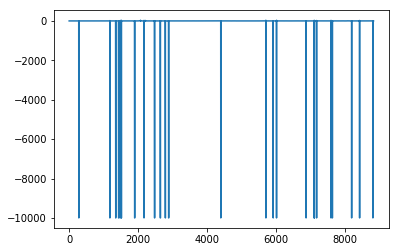

In [88]:
plt.plot(raw[:,1])

In [101]:
cols

array([[0.1450677 , 0.1450677 , 0.1450677 ],
       [0.14893617, 0.14893617, 0.14893617],
       [0.15473888, 0.15473888, 0.15473888],
       ...,
       [0.0696325 , 0.0696325 , 0.0696325 ],
       [0.08510638, 0.08510638, 0.08510638],
       [0.11025145, 0.11025145, 0.11025145]])